# Homework 1: Question 2

Nearly all companies seek to accurately predict future sales of their product(s).  If the company canaccurately predict sales before producing the product, then they can better match production withcustomer demand, thus reducing unnecessary inventory costs while being able to satisfy demandfor their product.In this exercise, you are asked to predict the monthly sales in the United States of the Nissan Rogueautomobile.  Nissan is a brand of Japanese automobiles which is now the sixth-largest automobilemanufacturer in the world, and was the number one car manufacturer in the United States in 2014.The Rogue is a car model of Nissan that was first produced in 2008.  It is Nissan’s best selling carin the United States.  We will use linear regression to predict monthly sales of the Rogue usingeconomic indicators of the United States as well as (normalized) Google search query volumes.  Thedata for this problem is contained in the fileRogue-142-Fall2021.csv.  Each observation in the fileis for a single month, from January 2008 through July 2021.  The variables are described in Table1.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

a)  (25 points) Start by splitting the data into a training set and two testing sets, testing set Aand testing set B. The training set should contain all observations from 2008 through 2015.Testing set A should have all observations from January 2016 through December 2019, andtesting set B should have all observations from January 2020 through July 2021.Consider  just  the  four  independent  variablesUnemployment,RogueQueries,CPIEnergy,  andCPIAll.  Using your regression skills, select a subset of these four variables and construct aregression model to predict monthly Rogue sales (RogueSales).  Try to choose which of thefour variables to use in your model in order to build a high-quality linear regression model.Use the training set to build your model,  and do not add any additional variables beyondthe four indicated independent variables.  Write a brief explanation (no more than one page,preferably less) – targeted to a statistically literate manager – describing how you decided onthe variables to use in the model and the quality of the linear regression model’s predictions,as evaluated using the training set (there is no need to consider the test set for this part ofthe problem).  Be sure to address the following in your explanation:

In [2]:
data = pd.read_csv('Rogue-142-Fall2021.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162 entries, 0 to 161
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MonthNumeric  162 non-null    int64  
 1   MonthFactor   162 non-null    object 
 2   Year          162 non-null    int64  
 3   RogueSales    162 non-null    int64  
 4   Unemployment  162 non-null    float64
 5   RogueQueries  162 non-null    int64  
 6   CPIAll        162 non-null    float64
 7   CPIEnergy     162 non-null    float64
dtypes: float64(3), int64(4), object(1)
memory usage: 10.2+ KB


In [3]:
data.head(5)

,MonthNumeric,MonthFactor,Year,RogueSales,Unemployment,RogueQueries,CPIAll,CPIEnergy
0,1,January,2008,5435,5.0,18,212.174,226.775
1,2,February,2008,5223,4.9,11,212.687,229.731
2,3,March,2008,6873,5.1,18,213.448,233.349
3,4,April,2008,5814,5.0,17,213.942,234.778
4,5,May,2008,7467,5.4,17,215.208,243.924


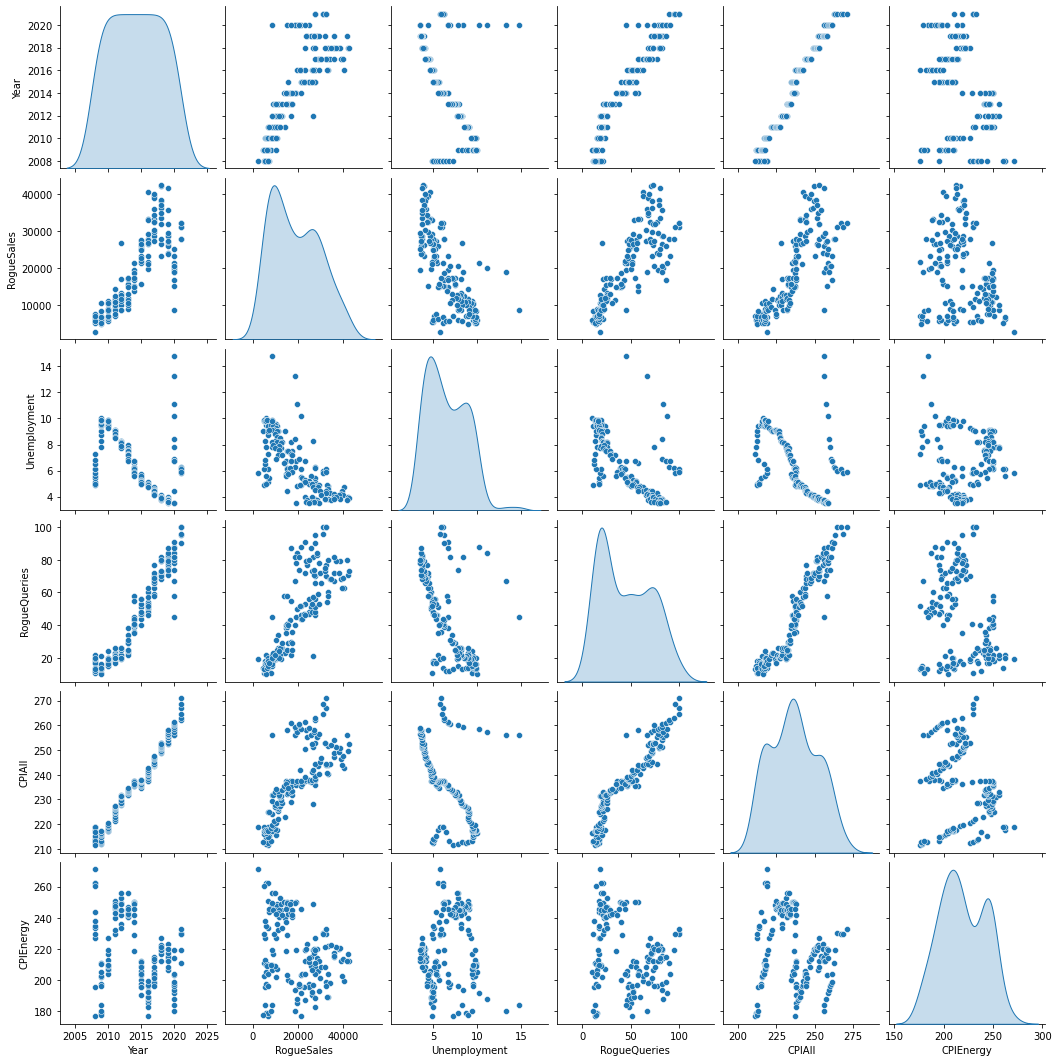

In [4]:
cols = ['Unemployment', 'RogueQueries', 'CPIEnergy', 'andCPIAll']
sns.pairplot(data.iloc[:,1:9],diag_kind='kde') 

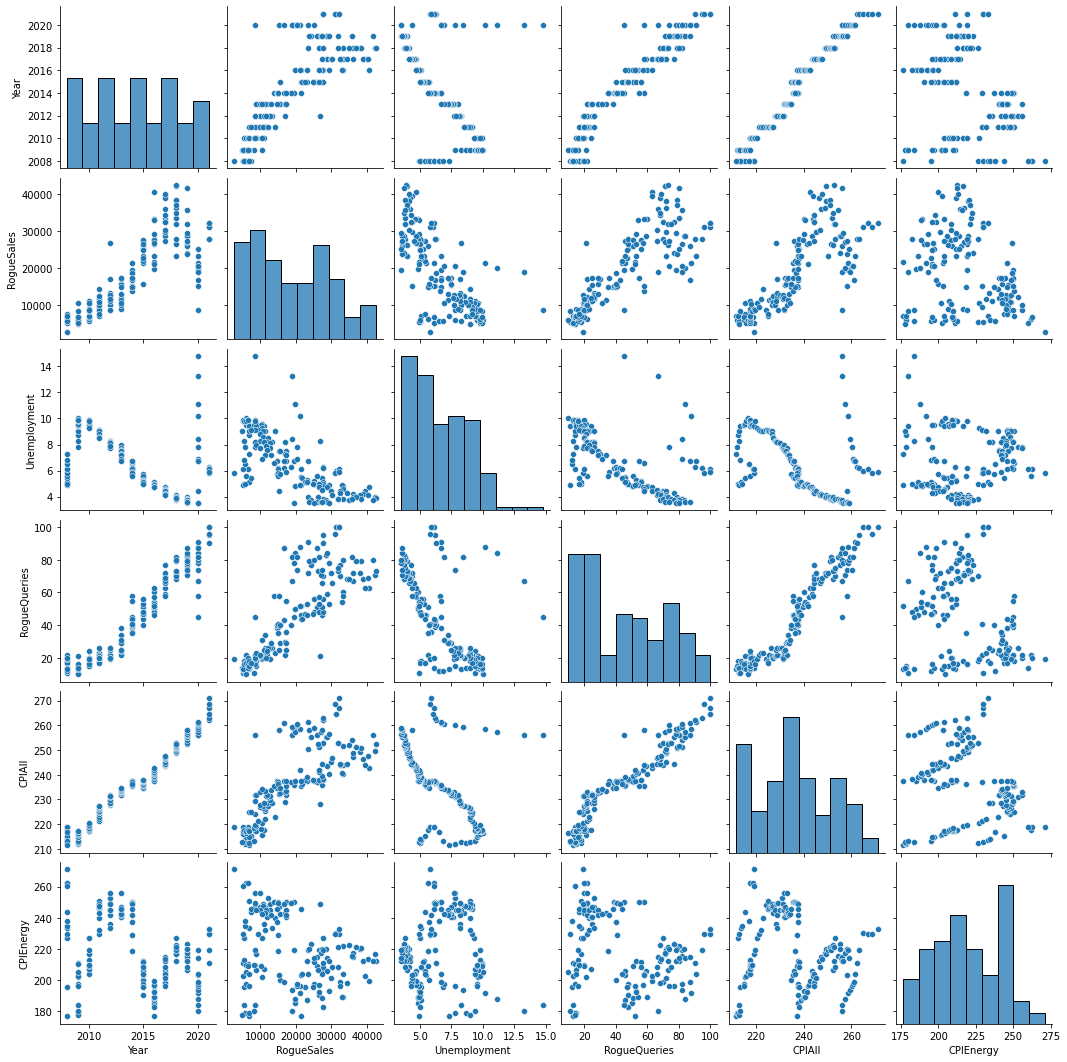

In [5]:
sns.pairplot(data.iloc[:,1:9],diag_kind='hist')

In [6]:
data.corr()

,MonthNumeric,Year,RogueSales,Unemployment,RogueQueries,CPIAll,CPIEnergy
MonthNumeric,1.000000,-0.055626,0.010250,0.005178,-0.027966,0.018573,0.023861
Year,-0.055626,1.000000,0.806593,-0.519502,0.955366,0.985993,-0.288663
RogueSales,0.010250,0.806593,1.000000,-0.708006,0.834824,0.776689,-0.281817
Unemployment,0.005178,-0.519502,-0.708006,1.000000,-0.606273,-0.520535,0.063876
RogueQueries,-0.027966,0.955366,0.834824,-0.606273,1.000000,0.951788,-0.284251
CPIAll,0.018573,0.985993,0.776689,-0.520535,0.951788,1.000000,-0.166129
CPIEnergy,0.023861,-0.288663,-0.281817,0.063876,-0.284251,-0.166129,1.000000


In [7]:
data_train = data[(data['Year'] >= 2008) & (data['Year'] <= 2015)]
data_test_A = data[(data['Year'] >= 2016) & (data['Year'] <= 2019)]
data_test_B = data[(data['Year'] >= 2020) & (data['Year'] <= 2021)]

len(data_train), len(data_test_A), len(data_test_B)

(96, 48, 18)

In [8]:
cols = ['Unemployment', 'RogueQueries', 'CPIEnergy', 'CPIAll']
X_train = data_train[cols]
y_train = data_train['RogueSales']

X_train = sm.add_constant(X_train)

model1 = sm.OLS(y_train, X_train).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:             RogueSales   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     88.71
Date:                Fri, 24 Sep 2021   Prob (F-statistic):           1.47e-30
Time:                        23:29:36   Log-Likelihood:                -898.41
No. Observations:                  96   AIC:                             1807.
Df Residuals:                      91   BIC:                             1820.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -6.918e+04   1.42e+04     -4.884   

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [9]:
def coefplot(results):
    '''
    Takes in results of OLS model and returns a plot of 
    the coefficients with 95% confidence intervals.
    
    Removes intercept, so if uncentered will return error.
    '''
    # Create dataframe of results summary 
    coef_df = pd.DataFrame(results.summary().tables[1].data)
    
    # Add column names
    coef_df.columns = coef_df.iloc[0]

    # Drop the extra row with column labels
    coef_df=coef_df.drop(0)

    # Set index to variable names 
    coef_df = coef_df.set_index(coef_df.columns[0])

    # Change datatype from object to float
    coef_df = coef_df.astype(float)

    # Get errors; (coef - lower bound of conf interval)
    errors = coef_df['coef'] - coef_df['[0.025']
    
    # Append errors column to dataframe
    coef_df['errors'] = errors

    # Drop the constant for plotting
    coef_df = coef_df.drop(['const'])

    # Sort values by coef ascending
    coef_df = coef_df.sort_values(by=['coef'])

    ### Plot Coefficients ###

    # x-labels
    variables = list(coef_df.index.values)
    
    # Add variables column to dataframe
    coef_df['variables'] = variables
    
    # Set sns plot style back to 'poster'
    # This will make bars wide on plot
    sns.set_context("poster")

    # Define figure, axes, and plot
    fig, ax = plt.subplots(figsize=(8, 5))
    
    # Error bars for 95% confidence interval
    # Can increase capsize to add whiskers
    coef_df.plot(x='variables', y='coef', kind='bar',
                 ax=ax, color='none', fontsize=22, 
                 ecolor='steelblue',capsize=0,
                 yerr='errors', legend=False)
    
    # Set title & labels
    plt.title('Coefficients of Features w/ 95% Confidence Intervals',fontsize=30)
    ax.set_ylabel('Coefficients',fontsize=22)
    ax.set_xlabel('',fontsize=22)
    
    # Coefficients
    ax.scatter(x=np.arange(coef_df.shape[0]), 
               marker='o', s=80, 
               y=coef_df['coef'], color='steelblue')
    
    # Line to define zero on the y-axis
    ax.axhline(y=0, linestyle='--', color='red', linewidth=1)
    
    return plt.show()


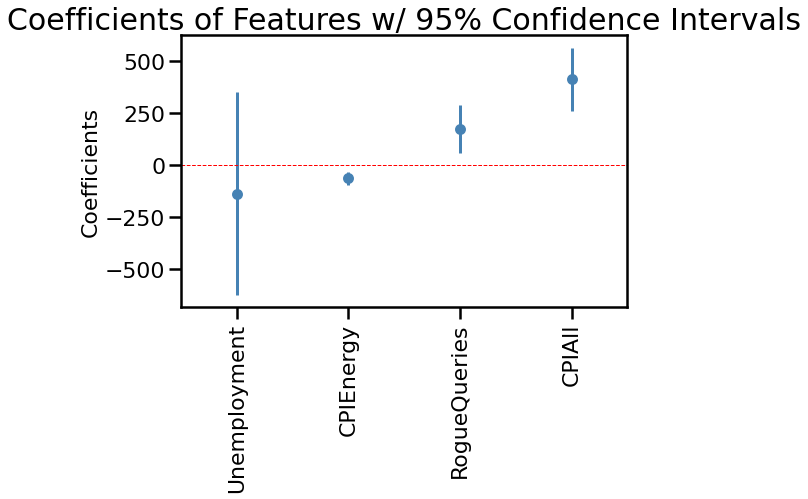

In [10]:
coefplot(model1)

In [11]:
ols = smf.ols(formula = 'RogueSales ~ Unemployment + RogueQueries + CPIEnergy + CPIAll', data = data_train)
model1 = ols.fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:             RogueSales   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     88.71
Date:                Fri, 24 Sep 2021   Prob (F-statistic):           1.47e-30
Time:                        23:29:36   Log-Likelihood:                -898.41
No. Observations:                  96   AIC:                             1807.
Df Residuals:                      91   BIC:                             1820.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -6.918e+04   1.42e+04     -4.884   

In [12]:
ols = smf.ols(formula = 'RogueSales ~ RogueQueries', data = data_train)
model2 = ols.fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:             RogueSales   R-squared:                       0.726
Model:                            OLS   Adj. R-squared:                  0.723
Method:                 Least Squares   F-statistic:                     249.5
Date:                Fri, 24 Sep 2021   Prob (F-statistic):           3.39e-28
Time:                        23:29:36   Log-Likelihood:                -912.48
No. Observations:                  96   AIC:                             1829.
Df Residuals:                      94   BIC:                             1834.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     1168.7582    777.053      1.504   

In [13]:
ols = smf.ols(formula = 'RogueSales ~ CPIAll', data = data_train)
model3 = ols.fit()
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:             RogueSales   R-squared:                       0.658
Model:                            OLS   Adj. R-squared:                  0.655
Method:                 Least Squares   F-statistic:                     181.2
Date:                Fri, 24 Sep 2021   Prob (F-statistic):           1.20e-23
Time:                        23:29:36   Log-Likelihood:                -923.13
No. Observations:                  96   AIC:                             1850.
Df Residuals:                      94   BIC:                             1855.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.165e+05   9571.075    -12.171      0.0

i) The equation of the linear regression produced by this model is RogueSales = -6.918e+04 + -138.5673(Unemployment) + 172.2780(RogueQueries) - 65.8007(CPIEnergy) + 410.8467(CPIAll). For this question (and if I were to choose one variable), I would choose RogueQueries. Giving me: RogueSales = -6.918e+04 + 172.2780(RogueQueries). For the coefficients, I used the numbers that were given to me for Intercept, Unemployment, RogueQueries, CPIEnergy, and CPIAll. 

ii) I selected the RogueQueries to include in my linear regression model (Model 2) by looking at the individual coefficients and using OLS to find the r-squared value for each variable.

iii) Only RogueQueries and CPIAll have positive coefficients. This makes sense since this indicates there is an increase in sales and that the CPI index is growing. (One interesting thing I noticed is that although CPIAll has a higher coefficient, it's r-squared value is lower than RogueQueries.) With an increase in sales, there should be an increase in employment due to higher demands causing the market to shift. CPI energy however decreases. This could be because they found a better way to cycle through energy.

In [14]:
def OSR2(model, df_train, df_test, dependent_var):   
    y_test = df_test[dependent_var]
    y_pred = model.predict(df_test)
    SSE = np.sum((y_test - y_pred)**2)
    SST = np.sum((y_test - np.mean(df_train[dependent_var]))**2)    
    return 1 - SSE/SST

In [15]:
#model1
OSR2(model1, data_train, data_test_A, 'RogueSales'), OSR2(model1, data_train, data_test_B, 'RogueSales')

(0.8958178734192356, -0.5873334088651119)

In [16]:
#model2
OSR2(model2, data_train, data_test_A, 'RogueSales'), OSR2(model2, data_train, data_test_B, 'RogueSales')

(0.8937464753142983, -0.22150726969571566)

In [17]:
#model3
OSR2(model3, data_train, data_test_A, 'RogueSales'), OSR2(model3, data_train, data_test_B, 'RogueSales')

(0.7880177425137795, 0.2749522885025868)

iv) To quantify how the model is doing, we compute an out-of-sample R-squared to get a good metric of whether or not the predictive formula has out-of-sample predictability. All models do well with test set A since the out-of-sample R-squared are all relatively high, but for test set B it is a lot lower. That means the data fits less into the model.
Model1, where we don't value pick (as harshly) has the best r-squared values throughout. This is probably due to having more variables to account for for a more accurate prediction. Model 2 does second best (with RogueQueries being the independent variable).

b) (15 points) Let us now try to further improve the linear regression model by modeling sea-sonality.  In predicting demand and sales, seasonality is often very important since demandfor most products tends to be periodic in time.  For example, demand for heavy jackets and coats tends to be higher in the winter, while demand for sunscreen tends to be higher in thesummer.Construct a new linear regression model using theMonthFactorvariable as an independentvariable, in addition to all four of the variables you used at the start of part(a).There isno need to do variable selection for this part of the problem. As before, constructyour model based on the training data.Answer the following questions about this modeling exercise.

In [18]:
ols = smf.ols(formula = 'RogueSales ~ Unemployment + RogueQueries + CPIEnergy + CPIAll + MonthFactor', data = data_train)
model4 = ols.fit()
print(model4.summary())

                            OLS Regression Results                            
Dep. Variable:             RogueSales   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     30.46
Date:                Fri, 24 Sep 2021   Prob (F-statistic):           7.49e-27
Time:                        23:29:37   Log-Likelihood:                -883.30
No. Observations:                  96   AIC:                             1799.
Df Residuals:                      80   BIC:                             1840.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

i) The regression model is RogueSales = -8.216e+04 +  -266.8447(Unemployment) + 111.2632(RogueQueries) + -78.2961(CPPIEnergy) + 486.4558(CPIAll) + SUMMATION(MonthFactor(coef) * MonthFactor(month)). The new independent variables of MonthFactor is useful since it takes into account of each month giving a better prediction to sales. We can tell when sales have been effected positively/negatively based on the coefficient positive/negative numbers. 

ii) R-squared = 0.851 based on the ols model. Variables that are significant are MonthFactor[T.August], MonthFactor[T.February], MonthFactor[T.July], MonthFactor[T.March], and MonthFactor[T.May] due to their larger/outlier values. 

In [19]:
#model4
OSR2(model4, data_train, data_test_A, 'RogueSales'), OSR2(model4, data_train, data_test_B, 'RogueSales')

(0.90554613936826, -0.5169656608471893)

iii) Adding the independent variable MonthFactor improved the quality of the model. We can tell based on the R-squared increased value from the ols model—meaning that the prediction is becoming better. Furthermore, based on the out-of-sample R-squared equation, the r-squared values are higher for test-set A and not that much lower for test-set B than the previous models. 

iv) A different way that might improve the given data to model seasonality is to calculate only using significant values such as the MonthlyFactor independent variables that we got and CPIAll and RogueQueries where the coefficients were large and the R-square values were high values as well.

c) (15 points) Build a final model using a subset of the independent variables used in parts(a)and(b), providing a brief justification for the variables selected.  What is the training setR2?What are theOSR2values for testing set A and testing set B? How do these three numberscompare to each other?  Please provide a plausible explanation for any significant differencesyou do or do not observe.

In [20]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def VIF(df, columns):
    values = sm.add_constant(df[columns]).values
    num_columns = len(columns)+1
    vif = [variance_inflation_factor(values, i) for i in range(num_columns)]
    return pd.Series(vif[1:], index=columns)

cols = ['Unemployment', 'RogueQueries', 'CPIEnergy', 'CPIAll', 'MonthNumeric']
VIF(data_train, cols)

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Unemployment    1.836871
RogueQueries    6.505797
CPIEnergy       1.604483
CPIAll          5.845808
MonthNumeric    1.096755
dtype: float64

In [21]:
#remove RogueQueries because of it's higher VIF
ols = smf.ols(formula = 'RogueSales ~ Unemployment + CPIEnergy + CPIAll + MonthFactor', data = data_train)
model5 = ols.fit()
print(model5.summary())

cols = ['Unemployment', 'CPIEnergy', 'CPIAll', 'MonthNumeric']
VIF(data_train, cols)

                            OLS Regression Results                            
Dep. Variable:             RogueSales   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     31.37
Date:                Fri, 24 Sep 2021   Prob (F-statistic):           7.31e-27
Time:                        23:29:37   Log-Likelihood:                -885.42
No. Observations:                  96   AIC:                             1801.
Df Residuals:                      81   BIC:                             1839.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Unemployment    1.355737
CPIEnergy       1.148952
CPIAll          1.546125
MonthNumeric    1.023715
dtype: float64

In [22]:
#model5
OSR2(model5, data_train, data_test_A, 'RogueSales'), OSR2(model5, data_train, data_test_B, 'RogueSales')

(0.8987975522464842, -0.31229345826875665)

ANSWER: Training set R-squared is 0.844 which is relatively high. The OSR^2 values are around 0.9 (Set A) and -0.31 (Set B). This means, the overall fit of the model is good. However, based on prediction out-of-sample, the R-square is only high for test Set A and relatively low for Set B. This means that the prediction for A is closer to accurate, while for Set B, it's not very accurate. 

d)  (10  points)  Let  us  now  consider  adding  an  additional  feature/variable  to  your  final  modelfrom part(c).  Based on your knowledge and intuition, think of a monthly variable that youhypothesize might be related to Nissan sales.  Provide a one or two sentence explanation foryour choice.  Search online for a data source for your chosen variable (if you are not able tofind data, then you need to pick a different variable), and append your collected data as anew column in the original data file.  (It is OK to use variables similar to what we used above,i.e., a different economic indicator or Google trends data for a different search term, but feelfree to get as creative as you like.)Now,  build  a  new  regression  model  with  your  additional  chosen  feature  in  addition  to  thefeatures that you selected in part(c).  Does the new feature add any predictive value?  Justifyyour answer based on the results of your analysis.

In [23]:
# I chose this data because it had the monthly values of revenue for each year. It was the best data I could find.
# Furthermore, it provides not just the sales data for Nissan Rogue, but Nissan as a whole.
data2 = pd.read_csv('Nissan Monthly Data.csv')
data2 = data2.melt(id_vars = ["Year"], var_name = "MonthFactor", value_name = 'Overall_Sales')
data2

,Year,MonthFactor,Overall_Sales
0,2005,January,"86,853"
1,2006,January,"83,360"
2,2007,January,"92,024"
3,2008,January,"85,831"
4,2009,January,"58,614"
...,...,...,...
199,2017,December,"146,727"
200,2018,December,"157,706"
201,2019,December,"114,696"
202,2020,December,"99,432"


In [24]:
data2 = data2[data2['Year'] >= 2008].iloc[:-6]
data2

,Year,MonthFactor,Overall_Sales
3,2008,January,"85,831"
4,2009,January,"58,614"
5,2010,January,"66,742"
6,2011,January,"77,561"
7,2012,January,"84,024"
...,...,...,...
193,2011,December,"105,959"
194,2012,December,"103,403"
195,2013,December,"116,181"
196,2014,December,"124,133"


In [25]:
data

,MonthNumeric,MonthFactor,Year,RogueSales,Unemployment,RogueQueries,CPIAll,CPIEnergy
0,1,January,2008,5435,5.0,18,212.174,226.775
1,2,February,2008,5223,4.9,11,212.687,229.731
2,3,March,2008,6873,5.1,18,213.448,233.349
3,4,April,2008,5814,5.0,17,213.942,234.778
4,5,May,2008,7467,5.4,17,215.208,243.924
...,...,...,...,...,...,...,...,...
157,2,February,2021,27750,6.2,95,263.161,218.946
158,3,March,2021,31219,6.0,100,264.793,229.886
159,4,April,2021,32270,6.1,100,266.832,229.658
160,5,May,2021,31029,5.8,96,268.551,229.630


In [26]:
new = data.merge(data2)

In [27]:
new['Overall_Sales'] = new['Overall_Sales'].str.replace(',', '').astype(float)
new

,MonthNumeric,MonthFactor,Year,RogueSales,Unemployment,RogueQueries,CPIAll,CPIEnergy,Overall_Sales
0,1,January,2008,5435,5.0,18,212.174,226.775,85831.0
1,2,February,2008,5223,4.9,11,212.687,229.731,95325.0
2,3,March,2008,6873,5.1,18,213.448,233.349,117671.0
3,4,April,2008,5814,5.0,17,213.942,234.778,84733.0
4,5,May,2008,7467,5.4,17,215.208,243.924,111304.0
...,...,...,...,...,...,...,...,...,...
131,2,February,2021,27750,6.2,95,263.161,218.946,100410.0
132,3,March,2021,31219,6.0,100,264.793,229.886,112963.0
133,4,April,2021,32270,6.1,100,266.832,229.658,109165.0
134,5,May,2021,31029,5.8,96,268.551,229.630,104967.0


In [28]:
new_train = new[(new['Year'] >= 2008) & (new['Year'] <= 2015)]
new_test_A = new[(new['Year'] >= 2016) & (new['Year'] <= 2019)]
new_test_B = new[(new['Year'] >= 2020) & (new['Year'] <= 2021)]

len(new_train), len(new_test_A), len(new_test_B)

(80, 40, 16)

In [29]:
cols = ['Unemployment', 'RogueQueries', 'CPIEnergy', 'CPIAll', 'Overall_Sales']
X_train = new_train[cols]
y_train = new_train['RogueSales']

X_train = sm.add_constant(X_train)
model6 = sm.OLS(y_train, X_train).fit()
print(model6.summary())

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


                            OLS Regression Results                            
Dep. Variable:             RogueSales   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                     230.7
Date:                Fri, 24 Sep 2021   Prob (F-statistic):           1.20e-43
Time:                        23:29:37   Log-Likelihood:                -700.23
No. Observations:                  80   AIC:                             1412.
Df Residuals:                      74   BIC:                             1427.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -5.629e+04   8407.431     -6.696

In [30]:
new_train

,MonthNumeric,MonthFactor,Year,RogueSales,Unemployment,RogueQueries,CPIAll,CPIEnergy,Overall_Sales
0,1,January,2008,5435,5.0,18,212.174,226.775,85831.0
1,2,February,2008,5223,4.9,11,212.687,229.731,95325.0
2,3,March,2008,6873,5.1,18,213.448,233.349,117671.0
3,4,April,2008,5814,5.0,17,213.942,234.778,84733.0
4,5,May,2008,7467,5.4,17,215.208,243.924,111304.0
...,...,...,...,...,...,...,...,...,...
75,6,June,2015,23243,5.3,53,237.657,212.015,132191.0
76,7,July,2015,25081,5.2,56,238.034,211.623,139913.0
77,8,August,2015,27665,5.1,56,238.033,208.579,141640.0
78,10,October,2015,24939,5.0,47,237.733,195.616,123473.0


In [31]:
ols = smf.ols(formula = 'RogueSales ~ Unemployment + CPIEnergy + CPIAll + MonthFactor + Overall_Sales', data = new_train)
model6 = ols.fit()
print(model6.summary())

                            OLS Regression Results                            
Dep. Variable:             RogueSales   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     82.17
Date:                Fri, 24 Sep 2021   Prob (F-statistic):           1.64e-35
Time:                        23:29:37   Log-Likelihood:                -698.81
No. Observations:                  80   AIC:                             1426.
Df Residuals:                      66   BIC:                             1459.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept               -6

In [32]:
cols = ['Unemployment', 'CPIEnergy', 'CPIAll', 'MonthNumeric', 'Overall_Sales']
VIF(new_train, cols)

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Unemployment     1.391547
CPIEnergy        1.185067
CPIAll           2.045711
MonthNumeric     1.080328
Overall_Sales    2.023504
dtype: float64

In [33]:
#model6
OSR2(model6, new_train, new_test_A, 'RogueSales'), OSR2(model6, new_train, new_test_B, 'RogueSales')

(0.9176242762470734, 0.7817424279952792)

ANSWER: The new feature does add predictive value based on the OLS models R-squares and OSSR^2 value. They are all significantly higher. 